In [1]:
import pandas as pd
pd.set_option('display.max_columns', 200)
import numpy as np
import pickle

In [2]:
with open('data_pick.pkl','rb') as pickle_file:
    accepted_df = pickle.load(pickle_file)
    

In [4]:
rejected = pd.read_csv('/Users/estebanzuniga/Downloads/lending_club_rejected')

In [73]:
accepted_df.funded_amnt.max()

40000.0

In [74]:
accepted_df.shape

(2260701, 151)

In [75]:
accepted_df.dtypes


id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object

In [76]:
accepted_df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [77]:
# any or all
mask = accepted_df.drop('id',axis =1).isna().all(axis = 1)

indices = accepted_df[mask].index

accepted_df.drop(indices, inplace = True)


In [78]:
accepted_df = accepted_df[(accepted_df['loan_status'] == 'Fully Paid') | (accepted_df['loan_status'] == 'Charged Off')]

In [79]:
accepted_df['loan_status_bin'] = accepted_df['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

In [80]:
accepted_df['loan_status_bin'].value_counts(normalize= True)

0    0.800374
1    0.199626
Name: loan_status_bin, dtype: float64

In [81]:
from sklearn.model_selection import train_test_split

target = accepted_df['loan_status_bin']
features = accepted_df.drop('loan_status_bin', axis=1)

X_trash, X_new, y_trash, y_new = train_test_split(features, target, test_size = 0.02, stratify=target)

In [82]:
new_df = pd.concat([X_new, y_new], axis=1)
print("Old df", accepted_df.shape)
print("New df",new_df.shape)

Old df (1345310, 152)
New df (26907, 152)


In [83]:
new_df['loan_status_bin'].value_counts(normalize=True)

0    0.800387
1    0.199613
Name: loan_status_bin, dtype: float64

In [84]:
(new_df.member_id.isna().sum()) == (len(new_df.member_id))

True

In [85]:
new_df.drop(columns=('member_id'), inplace = False)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status_bin
1050494,72702538,20000.0,20000.0,20000.0,36 months,9.75,643.00,B,B3,Accounting Administrator,< 1 year,MORTGAGE,50000.0,Source Verified,Feb-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,023xx,MA,27.09,1.0,Feb-1983,670.0,674.0,0.0,17.0,NaN,11.0,0.0,10629.0,62.9,31.0,f,0.0,0.0,22963.061485,22963.06,20000.00,2963.06,0.00,0.0,0.0,Jul-2018,54.20,NaN,Jul-2018,669.0,665.0,0.0,32.0,1.0,Individual,NaN,NaN,NaN,0.0,770.0,213607.0,1.0,1.0,0.0,0.0,96.0,6062.0,33.0,1.0,4.0,7705.0,47.0,16900.0,0.0,0.0,0.0,4.0,23734.0,5625.0,62.5,0.0,0.0,147.0,396.0,6.0,6.0,3.0,6.0,33.0,17.0,33.0,5.0,3.0,5.0,3.0,10.0,4.0,8.0,24.0,5.0,11.0,0.0,0.0,0.0,1.0,74.2,66.7,0.0,0.0,243311.0,16691.0,15000.0,18668.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
125753,60964339,16000.0,16000.0,16000.0,36 months,12.29,533.65,C,C1,NaN,NaN,MORTGAGE,72000.0,Verified,Oct-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,Home improvement,531xx,WI,30.08,0.0,Nov-1997,665.0,669.0,1.0,44.0,NaN,14.0,0.0,29442.0,95.9,49.0,f,0.0,0.0,19189.456371,19189.46,16000.00,3189.46,0.00,0.0,0.0,Oct-2018,533.56,NaN,Jan-2019,694.0,690.0,0.0,57.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,247136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30700.0,NaN,NaN,NaN,7.0,17653.0,377.0,98.1,0.0,0.0,170.0,214.0,14.0,14.0,4.0,14.0,44.0,1.0,44.0,3.0,5.0,9.0,5.0,10.0,16.0,10.0,28.0,9.0,14.0,0.0,0.0,0.0,0.0,81.6,80.0,0.0,0.0,290712.0,67235.0,

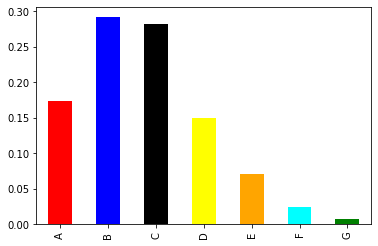

In [86]:
(new_df['grade'].value_counts().sort_index()/len(new_df)).plot.bar(color=('red','blue','black','yellow','orange','cyan','green'))

In [87]:
# turning employment length into numeric values

def emp_to_num(term):
    if pd.isna(term):
        return None
    elif term[2]=='+':
        return 10
    elif term[0]=='<':
        return 0
    else:
        return int(term[0])

In [88]:
new_df['emp_length_num'] = new_df['emp_length'].apply(emp_to_num)

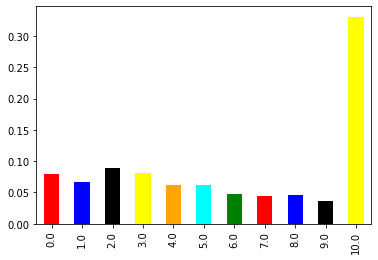

In [89]:
(new_df['emp_length_num'].value_counts().sort_index()/len(new_df)).plot.bar(color=('red','blue','black','yellow','orange','cyan','green'))

In [90]:
# is there a connection with employment lenght to default

new_df['loan_status_bin'].value_counts(normalize=True)

0    0.800387
1    0.199613
Name: loan_status_bin, dtype: float64

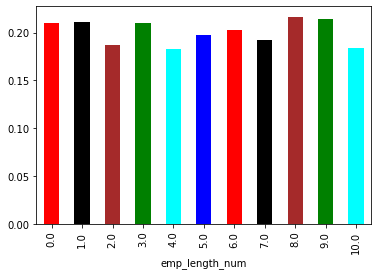

In [91]:
new_df.groupby('emp_length_num')['loan_status_bin'].mean().plot.bar(color=('red','black','brown','green','cyan','blue'))

In [92]:
new_df['long_emp'] = new_df['emp_length'].apply(lambda x : 1*(x=='10+years'))
new_df['short_emp'] = new_df['emp_length'].apply(lambda x : 1*(x=='1 year' or x=='< 1 year'))

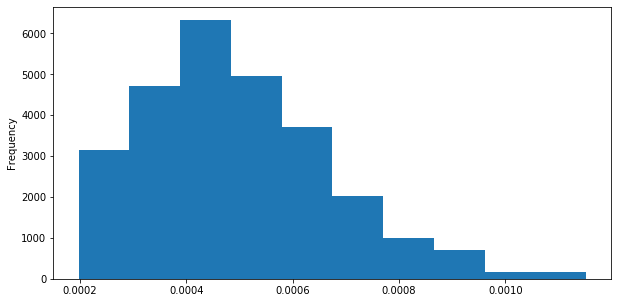

In [93]:
(new_df['int_rate']/len(new_df)).plot.hist(bins=10, figsize=(10,5))

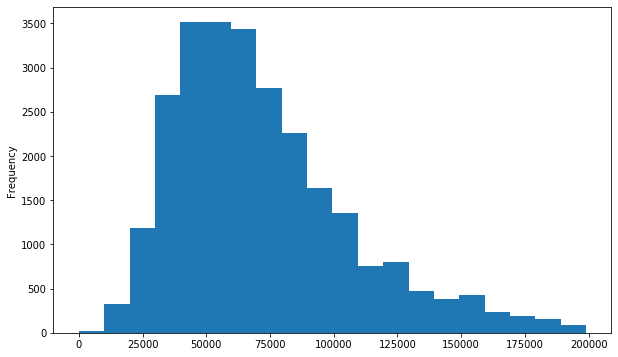

In [94]:
new_df[new_df['annual_inc']<200000]['annual_inc'].plot.hist(bins=20, figsize=(10,6))
new_df['annual_inc_log'] = new_df['annual_inc'].apply(np.log)

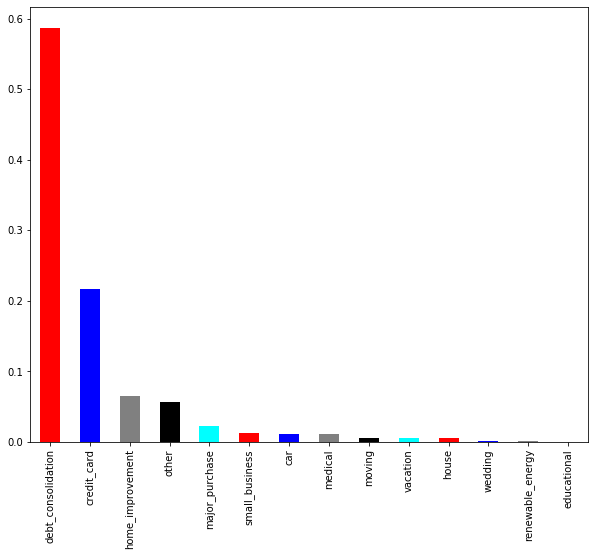

In [95]:
(new_df['purpose'].value_counts()/len(new_df)).plot.bar(figsize=(10,8), color= ('red','blue','grey','black','cyan'))

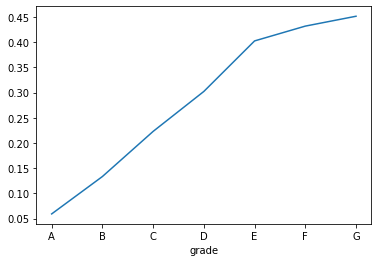

In [96]:
new_df.groupby('grade')['loan_status_bin'].mean().plot.line()

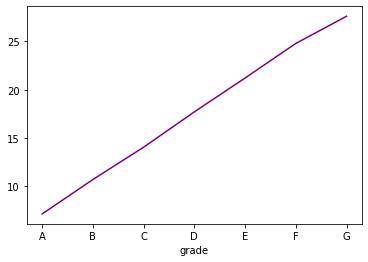

In [97]:
new_df.groupby('grade')['int_rate'].mean().plot.line(color= 'purple')

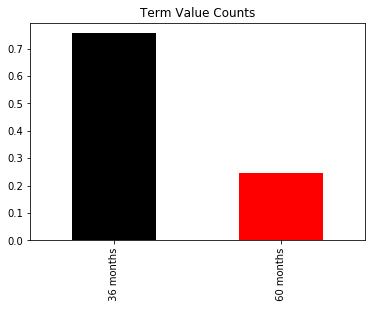

In [98]:
(new_df['term'].value_counts()/len(new_df)).plot.bar(color=('black','red'),title='Term Value Counts')

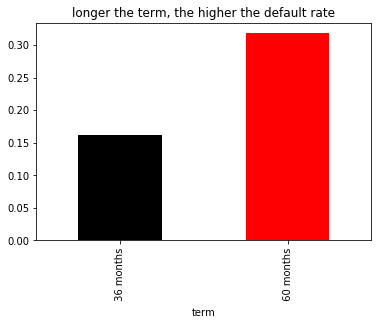

In [99]:
new_df.groupby('term')['loan_status_bin'].mean().plot.bar(color=('black','red'), title='longer the term, the higher the default rate')

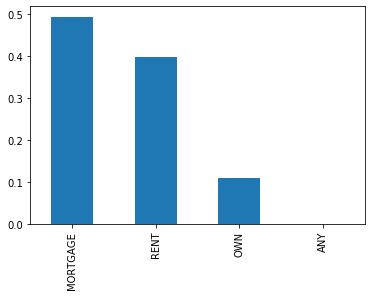

In [100]:
(new_df['home_ownership'].value_counts()/len(new_df)).plot.bar()

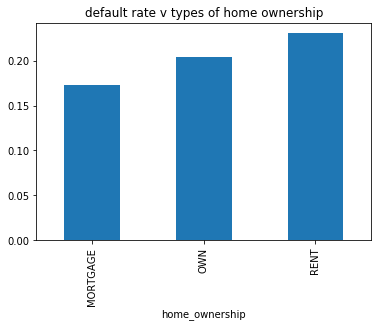

In [101]:
new_df[(new_df['home_ownership']=='MORTGAGE') | (new_df['home_ownership']=='OWN') 
| (new_df['home_ownership']=='RENT')].groupby('home_ownership')['loan_status_bin'].mean().plot.bar(title='default rate v types of home ownership')






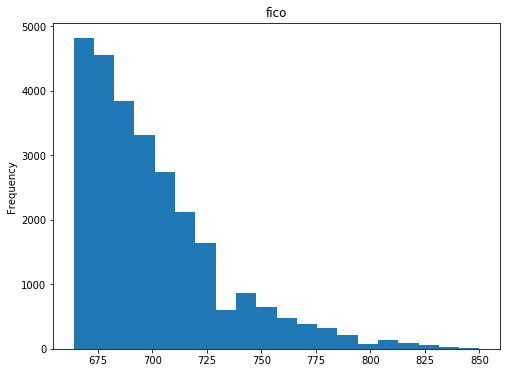

In [102]:
new_df['fico_range_high'].plot.hist(bins=20, title='fico', figsize=(8,6))

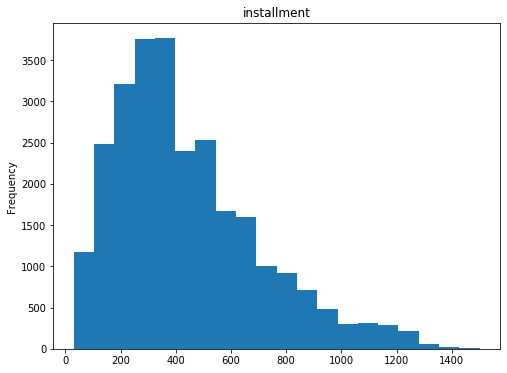

In [103]:
new_df['installment'].plot.hist(bins= 20, title='installment', figsize=(8,6))

In [104]:
 new_df[new_df['loan_status_bin']==1].total_pymnt.mean()

8305.743336368674

In [105]:
 new_df[new_df['loan_status_bin']==0].total_pymnt.mean()

16505.94639335168

In [106]:
new_df[new_df['loan_status_bin']==1].loan_amnt.mean()

15693.311301433625

In [107]:
new_df[new_df['loan_status_bin']==0].loan_amnt.mean()

14158.082977340267

In [108]:
len(new_df[new_df['loan_status_bin']==1])

5371

In [109]:
new_df[new_df['loan_status_bin']==1].int_rate.mean()

15.792304971141556

In [110]:
new_df[new_df['loan_status_bin']==0].int_rate.mean()

12.650630107725815

In [111]:
new_df[new_df['loan_status_bin']==1].installment.mean()

470.0534593185657

In [112]:
new_df[new_df['loan_status_bin']==0].installment.mean()

431.2457721953965

In [113]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = new_df.groupby('sub_grade')['loan_status_bin'].mean().values.reshape(-1,1)
y = new_df.groupby('sub_grade')['int_rate'].mean()

lr.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'Liner Regression')

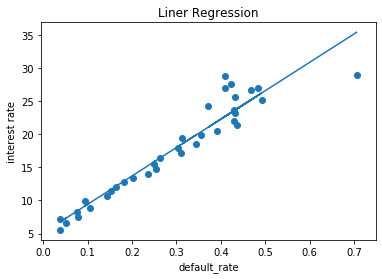

In [114]:
import matplotlib.pyplot as plt
plt.scatter(new_df.groupby('sub_grade')['loan_status_bin'].mean(), new_df.groupby('sub_grade')['int_rate'].mean())
plt.plot(new_df.groupby('sub_grade')['loan_status_bin'].mean(), lr.predict(new_df.groupby('sub_grade')['loan_status_bin'].mean().values.reshape(-1,1)))
plt.xlabel('default_rate')
plt.ylabel('interest rate')
plt.title('Liner Regression')


In [115]:
columns = ['loan_amnt','term','int_rate','installment','grade','emp_length','home_ownership','annual_inc_log',
          'verification_status','purpose','addr_state','dti','delinq_2yrs','fico_range_low','inq_last_6mths',
          'open_acc','pub_rec','revol_bal','revol_util','total_acc','loan_status_bin']

In [116]:
new_df = new_df[columns]

In [117]:
new_df.to_csv('new_df.csv')

In [118]:
new_df.sample()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc_log,verification_status,purpose,addr_state,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status_bin
1248831,18000.0,36 months,8.39,567.3,A,2 years,MORTGAGE,11.326596,Not Verified,home_improvement,TX,14.11,0.0,715.0,0.0,12.0,0.0,7114.0,18.0,19.0,0


In [119]:
new_df['grade'] = new_df['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

In [121]:
dummy_df = pd.get_dummies(new_df)

In [122]:
drop_columns = dummy_df.columns[(dummy_df.mean() < .01)]
dummy_df.drop(drop_columns,axis=1,inplace=True)


In [123]:
dummy_df['verification_status_Verified_sum'] = dummy_df['verification_status_Source Verified']+dummy_df['verification_status_Verified']
dummy_df.drop(['verification_status_Source Verified', 'verification_status_Verified'], axis=1, inplace=True)


In [124]:
dummy_df.head()

,loan_amnt,int_rate,installment,grade,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status_bin,term_ 36 months,term_ 60 months,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business,addr_state_AL,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_FL,addr_state_GA,addr_state_IL,addr_state_IN,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_NC,addr_state_NJ,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OR,addr_state_PA,addr_state_SC,addr_state_TN,addr_state_TX,addr_state_VA,addr_state_WA,addr_state_WI,verification_status_Verified_sum
1050494,20000.0,9.75,643.00,2,27.09,1.0,670.0,0.0,11.0,0.0,10629.0,62.9,31.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
125753,16000.0,12.29,533.65,3,30.08,0.0,665.0,1.0,14.0,0.0,29442.0,95.9,49.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
140327,19200.0,6.24,586.20,1,23.24,0.0,695.0,0.0,13.0,0.0,21128.0,88.8,38.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1088537,12000.0,16.59,295.60,4,10.29,0.0,665.0,1.0,17.0,3.0,7063.0,43.9,36.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1336616,10000.0,16.24,352.76,3,5.26,0.0,695.0,0.0,10.0,1.0,29373.0,74.6,13.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [125]:
dummy_df.dropna(inplace= True)

In [126]:
X = dummy_df.drop('loan_status_bin',axis= 1)
y = dummy_df['loan_status_bin']

ImportError: cannot import name 'SMOTE' from 'imblearn.under_sampling' (/Users/estebanzuniga/opt/anaconda3/lib/python3.7/site-packages/imblearn/under_sampling/__init__.py)

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [128]:
from sklearn.linear_model import LogisticRegression


In [129]:
logit = LogisticRegression(C=.95)

logit.fit(X_train,y_train)
logit.score(X_val,y_val)

/Users/estebanzuniga/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.803793937139669

In [130]:
logit.predict(X_val[:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [131]:
logit.predict_proba(X_val[:10])

array([[0.84387831, 0.15612169],
       [0.78519988, 0.21480012],
       [0.87232264, 0.12767736],
       [0.81025023, 0.18974977],
       [0.8336585 , 0.1663415 ],
       [0.78552371, 0.21447629],
       [0.85810075, 0.14189925],
       [0.8951339 , 0.1048661 ],
       [0.80542835, 0.19457165],
       [0.89810687, 0.10189313]])

In [132]:
from sklearn.metrics import confusion_matrix

In [133]:
confusion_matrix(y_val,logit.predict(X_val))

array([[4303,   25],
       [1030,   19]])

In [134]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [135]:
# using the default threshold of 0.5, which is what predict does
y_predict = logit.predict(X_val)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, y_predict), 
                                                     recall_score(y_val, y_predict)))

Default threshold:
Precision: 0.4318,   Recall: 0.0181


In [136]:
y_predict = (logit.predict_proba(X_val)[:,1] > 0.25)
print("Threshold of 0.29:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, y_predict), 
                                                     recall_score(y_val, y_predict)))

Threshold of 0.29:
Precision: 0.3573,   Recall: 0.4547


In [137]:
confusion_matrix(y_val,y_predict)

array([[3470,  858],
       [ 572,  477]])

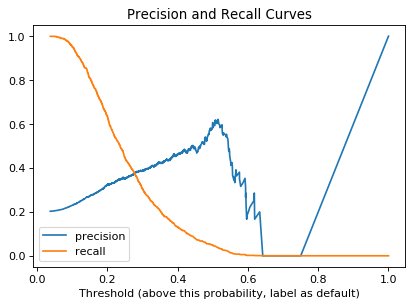

In [59]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val, logit.predict_proba(X_val)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as default)');
plt.title('Precision and Recall Curves');

In [59]:
y_predict = logit.predict(X_val)
print('The F-beta score is :')
fbeta_score(y_val,y_predict,beta = 2)

The F-beta score is :


0.015172735760971055

In [60]:
new_df['loan_status_bin'].value_counts(normalize=True)

0    0.800387
1    0.199613
Name: loan_status_bin, dtype: float64

In [ ]:
# confusion matrix 
# classification report
# if recall too low move threshold up. to take more risk. 
# logistic .predict (hard predict)/ or logist_predict proba will give list that contains 20 list will have l
# feature engineering/?
# decision trees/ random forest